# Building CNN on MNIST Dataset.

In this notebook, we will build a simple CNN-based architecture to classify the 10 digits (0-9) of the MNIST dataset. The objective of this notebook is to become familiar with the process of building CNNs in Keras.

We will go through the following steps:

1.Importing libraries and the dataset

2.Visualisation of random records

3.Data preparation: Train-test split, specifying the shape of the input data etc.

4.Building and understanding the CNN architecture

5.Fitting and evaluating the model

## 1. Importing Libraries and the Dataset

In [1]:
import numpy as np
import random
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

In [2]:
# load the dataset into train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
print("train data")
print(x_train.shape)
print(y_train.shape)
print("\n test data")
print(x_test.shape)
print(y_test.shape)

train data
(60000, 28, 28)
(60000,)

 test data
(10000, 28, 28)
(10000,)


## 2. Data Visualisation

Displaying random record.

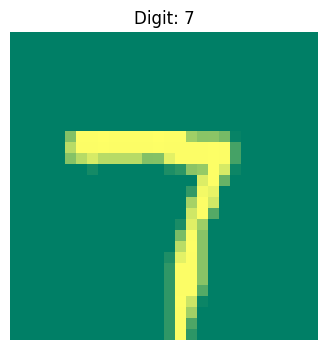

In [27]:
random_index = np.random.randint(0, len(x_train))
plt.figure(figsize=(4, 4))
plt.imshow(x_train[random_index], cmap='summer')
plt.title('Digit: {}'.format(y_train[random_index]))
plt.axis('off')
plt.show()

In [28]:
print("Label of the displayed digit:", y_train[random_index])


Label of the displayed digit: 7


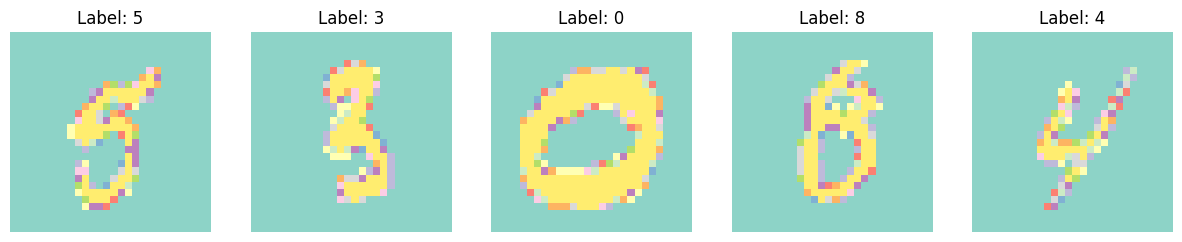

In [29]:
random_train_indices = np.random.randint(0, len(x_train), 5)

# Display random images from the training data using Matplotlib
plt.figure(figsize=(15, 5))
for i, index in enumerate(random_train_indices):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_train[index], cmap='Set3')
    plt.title("Label: {}".format(y_train[index]))
    plt.axis('off')

plt.show()


Count of each digit in the training dataset


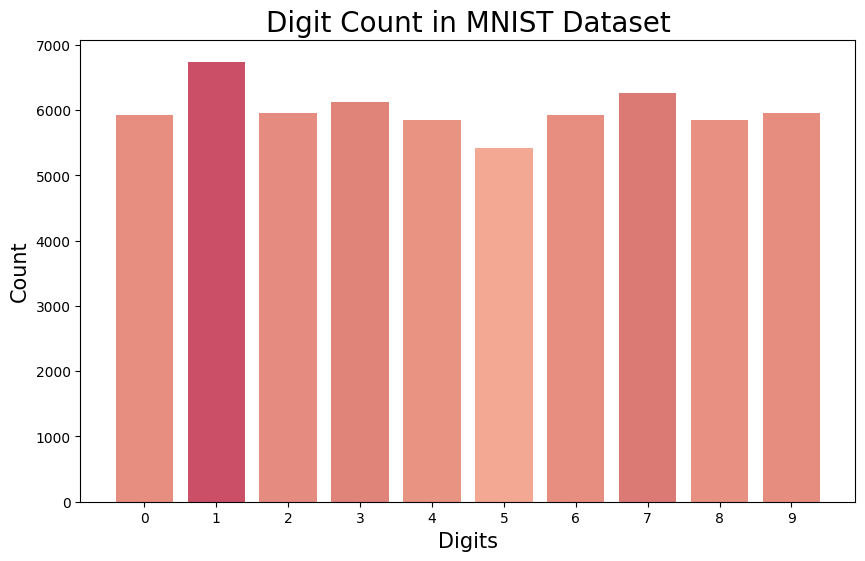

In [30]:
digit_counts = np.bincount(y_train)

# Digits from 0 to 9
digits = np.arange(10)

cmap = plt.get_cmap('coolwarm')

# Normalize the digit counts to use with the colormap
norm_digit_counts = digit_counts / digit_counts.max()

# Create a bar graph with colormap
plt.figure(figsize=(10, 6))
plt.bar(digits, digit_counts, align='center', alpha=0.7, color=cmap(norm_digit_counts))
plt.xlabel('Digits', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Digit Count in MNIST Dataset', fontsize=20)
plt.xticks(digits)
plt.show()

Random record with the pixel value.

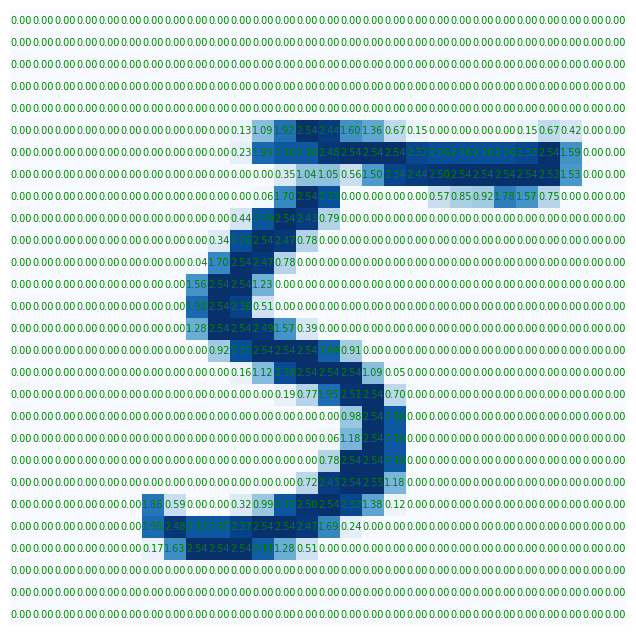

In [31]:
random_index = np.random.randint(0, len(x_train))
# Display the random digit image with pixel values
plt.figure(figsize=(8, 8))

# Display the digit using imshow with 'gray' colormap
plt.imshow(x_train[random_index], cmap='Blues')
#plt.title('Digit: {}'.format(y_train[random_index]))
plt.axis('off')

# Overlay pixel values as text on the image
for i in range(28):
    for j in range(28):
        pixel_value = x_train[random_index][i, j] / 100  # Divide pixel value by 100
        scalar_pixel_value = pixel_value.item()  # Convert NumPy array to scalar
        plt.text(j, i, '{:.2f}'.format(scalar_pixel_value), ha='center', va='center', color='green', fontsize=7)

plt.show()


## 3. Data Preparation

Let's prepare the dataset for feeding to the network. The following three main steps:<br>

#### 3.1 Reshape the Data

#### 3.2 Rescaling (Normalisation)

#### 3.3 Converting Input Data Type: Int to Float


In [4]:
# sample only 20k images for training
idx = np.random.randint(x_train.shape[0], size=20000) # sample 20k indices from 0-60,000
x_train = x_train[idx, :]
y_train = y_train[idx]
print(x_train.shape)
print(y_train.shape)

(20000, 28, 28)
(20000,)


In [22]:
# specify input dimensions of each image
img_rows, img_cols = 28, 28
input_shape = (img_rows, img_cols, 1)

# batch size, number of classes, epochs
batch_size = 128
num_classes = 10
epochs = 24

In [6]:
# reshape x_train and x_test
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
print(x_train.shape)
print(x_test.shape)

(20000, 28, 28, 1)
(10000, 28, 28, 1)


In [7]:
# convert class labels (from digits) to one-hot encoded vectors
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)
print(y_train.shape)

(20000, 10)


In [8]:
# originally, the pixels are stored as ints
x_train.dtype

dtype('uint8')

In [9]:
# convert int to float
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# normalise
x_train /= 255
x_test /= 255

## 4. Building the Model

In [23]:
# model
model = Sequential()

# a keras convolutional layer is called Conv2D
# help(Conv2D)
# note that the first layer needs to be told the input shape explicitly

# first conv layer
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape)) # input shape = (img_rows, img_cols, 1)

# second conv layer
model.add(Conv2D(64, kernel_size=(3, 3),
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# flatten and put a fully connected layer
model.add(Flatten())
model.add(Dense(128, activation='relu')) # fully connected
model.add(Dropout(0.5))

# softmax layer
model.add(Dense(num_classes, activation='softmax'))

# model summary
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_6 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 12, 12, 64)        0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 12, 12, 64)        0         
                                                                 
 flatten_2 (Flatten)         (None, 9216)              0         
                                                                 
 dense_4 (Dense)             (None, 128)               1179776   
                                                      

In [24]:
#Training on more no. of layers and then evaluating it
# model
model = Sequential()

# a keras convolutional layer is called Conv2D
# help(Conv2D)
# note that the first layer needs to be told the input shape explicitly

# first conv layer
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 padding='same',
                 input_shape=input_shape)) # input shape = (img_rows, img_cols, 1)
model.add(MaxPooling2D(pool_size=(2,2)))


# second conv layer
model.add(Conv2D(64, kernel_size=(3, 3),
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


# third layer
model.add(Conv2D(128, kernel_size=(3, 3),
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


# flatten and put a fully connected layer
model.add(Flatten())
model.add(Dense(128, activation='relu')) # fully connected
model.add(Dropout(0.20))

# softmax layer
model.add(Dense(num_classes, activation='softmax'))

# model summary
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 2, 2, 128)        

## 5. Fitting and Evaluating the Model


In [25]:
# usual cross entropy loss
# choose any optimiser such as adam, rmsprop etc
# metric is accuracy
model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [26]:
# fit the model
# this should take around 10-15 minutes when run locally on a windows/mac PC
model_history=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Epoch 1/24
157/157 [==============================] - 27s 167ms/step - loss: 2.3059 - accuracy: 0.1112 - val_loss: 2.3022 - val_accuracy: 0.1285
Epoch 2/24
157/157 [==============================] - 25s 156ms/step - loss: 2.3009 - accuracy: 0.1151 - val_loss: 2.2967 - val_accuracy: 0.1367
Epoch 3/24
157/157 [==============================] - 26s 164ms/step - loss: 2.2959 - accuracy: 0.1255 - val_loss: 2.2914 - val_accuracy: 0.1446
Epoch 4/24
157/157 [==============================] - 26s 164ms/step - loss: 2.2903 - accuracy: 0.1305 - val_loss: 2.2862 - val_accuracy: 0.1520
Epoch 5/24
157/157 [==============================] - 24s 154ms/step - loss: 2.2848 - accuracy: 0.1405 - val_loss: 2.2811 - val_accuracy: 0.1595
Epoch 6/24
157/157 [==============================] - 25s 158ms/step - loss: 2.2800 - accuracy: 0.1460 - val_loss: 2.2760 - val_accuracy: 0.1653
Epoch 7/24
157/157 [==============================] - 24s 152ms/step - loss: 2.2753 - accuracy: 0.1555 - val_loss: 2.2708 - val_ac

In [29]:

#using adam optimizer
model.compile(loss=tf.keras.losses.categorical_crossentropy,
        optimizer=tf.keras.optimizers.Adam(learning_rate = 1e-4),
        metrics=['accuracy'])

In [30]:
# fit the model
# this should take around 10-15 minutes when run locally on a windows/mac PC
model_history=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Epoch 1/24
157/157 [==============================] - 26s 157ms/step - loss: 1.4103 - accuracy: 0.6655 - val_loss: 0.5550 - val_accuracy: 0.8764
Epoch 2/24
157/157 [==============================] - 24s 156ms/step - loss: 0.4633 - accuracy: 0.8687 - val_loss: 0.2568 - val_accuracy: 0.9325
Epoch 3/24
157/157 [==============================] - 26s 164ms/step - loss: 0.2890 - accuracy: 0.9148 - val_loss: 0.1837 - val_accuracy: 0.9487
Epoch 4/24
157/157 [==============================] - 26s 167ms/step - loss: 0.2209 - accuracy: 0.9352 - val_loss: 0.1547 - val_accuracy: 0.9540
Epoch 5/24
157/157 [==============================] - 26s 168ms/step - loss: 0.1839 - accuracy: 0.9452 - val_loss: 0.1302 - val_accuracy: 0.9594
Epoch 6/24
157/157 [==============================] - 26s 164ms/step - loss: 0.1600 - accuracy: 0.9524 - val_loss: 0.1113 - val_accuracy: 0.9649
Epoch 7/24
157/157 [==============================] - 26s 165ms/step - loss: 0.1413 - accuracy: 0.9567 - val_loss: 0.1025 - val_ac

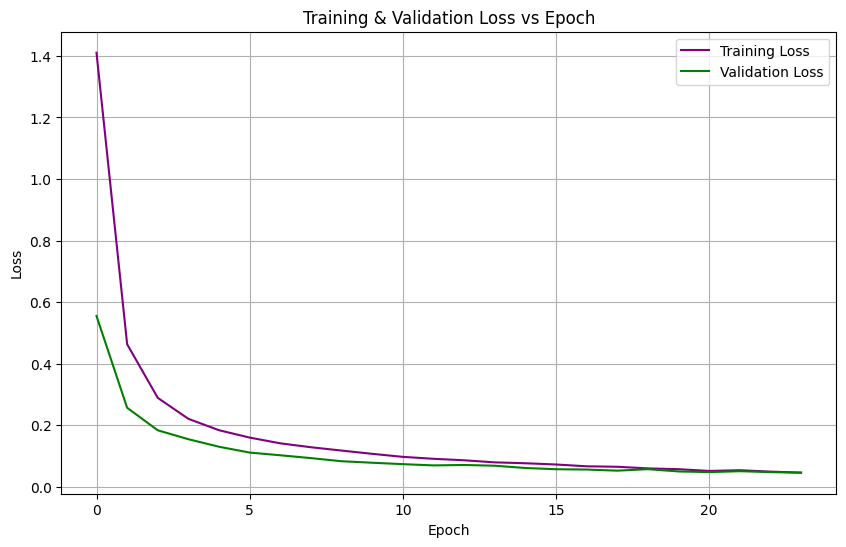

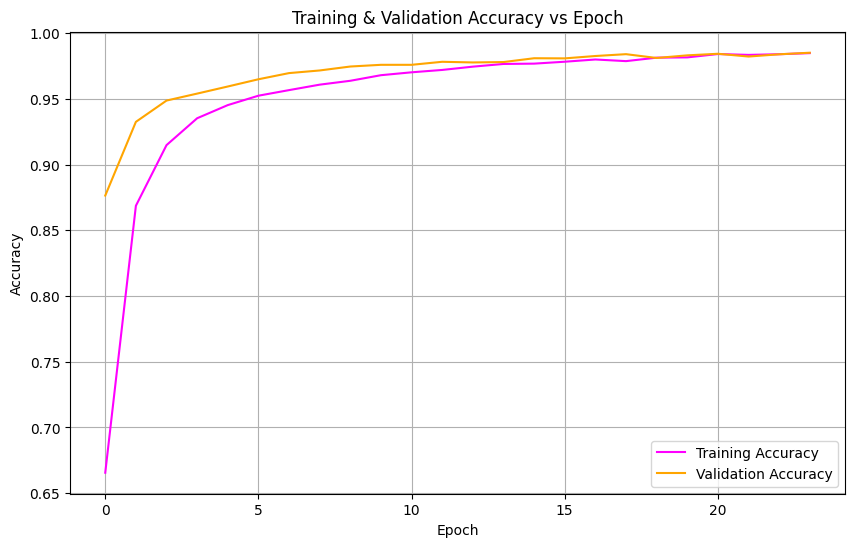

In [31]:
# Plot training & validation loss values
plt.figure(figsize=(10, 6))
plt.plot(model_history.history['loss'], label='Training Loss', color='purple')
plt.plot(model_history.history['val_loss'], label='Validation Loss', color='green')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training & Validation Loss vs Epoch')
plt.legend()
plt.grid(True)
plt.show()

# Plot training & validation accuracy values
plt.figure(figsize=(10, 6))
plt.plot(model_history.history['accuracy'], label='Training Accuracy', color='magenta')
plt.plot(model_history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy vs Epoch')
plt.legend()
plt.grid(True)
plt.show()

In [32]:
# evaluate the model on test data
model.evaluate(x_test, y_test)

313/313 [==============================] - 4s 13ms/step - loss: 0.0458 - accuracy: 0.9851


[0.045815400779247284, 0.9850999712944031]

In [ ]:
print(model.metrics_names)

['loss', 'accuracy']


1/1 [==============================] - 0s 42ms/step


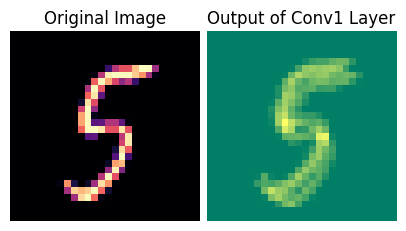

1/1 [==============================] - 0s 20ms/step


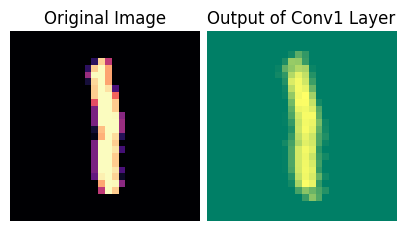

1/1 [==============================] - 0s 23ms/step


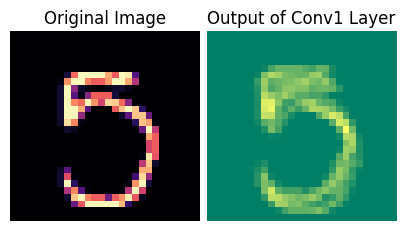

1/1 [==============================] - 0s 23ms/step


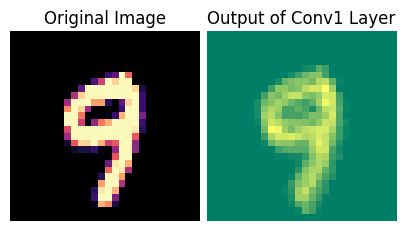

1/1 [==============================] - 0s 20ms/step


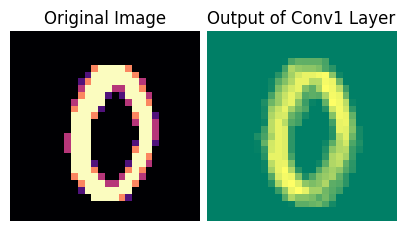

1/1 [==============================] - 0s 44ms/step


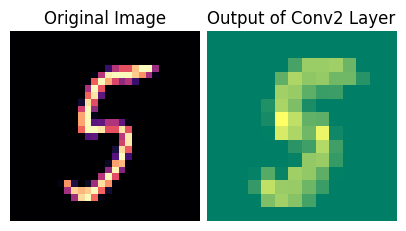

1/1 [==============================] - 0s 25ms/step


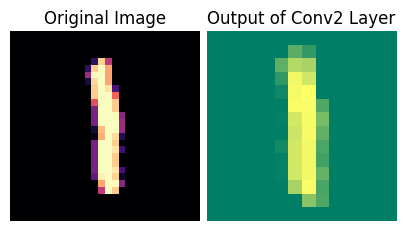

1/1 [==============================] - 0s 23ms/step


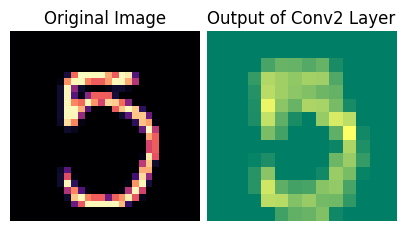

1/1 [==============================] - 0s 37ms/step


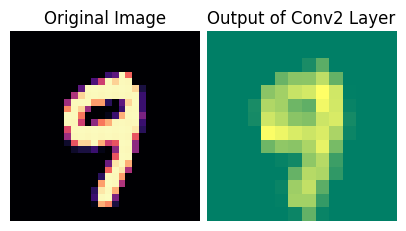

1/1 [==============================] - 0s 31ms/step


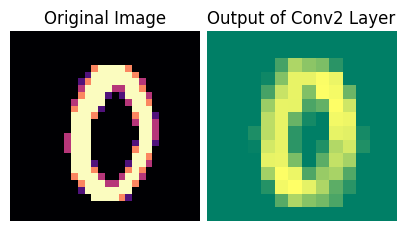

In [21]:
# Create intermediate models for each convolutional layer
conv1_output_model = tf.keras.models.Model(inputs=model.input, outputs=model.layers[0].output)
conv2_output_model = tf.keras.models.Model(inputs=model.input, outputs=model.layers[1].output)

# Generate random indices for visualization
random_indices = random.sample(range(len(x_test)), 5)  # Change 5 to the number of random records you want to visualize

# Visualize outputs of the first convolutional layer
for index in random_indices:
    plt.figure(figsize=(4, 4))

    # Original image
    plt.subplot(1, 2, 1)
    plt.imshow(x_test[index].reshape(28, 28), cmap='magma')
    plt.title('Original Image')
    plt.axis('off')

    # Output of the first convolutional layer
    plt.subplot(1, 2, 2)
    conv1_output = conv1_output_model.predict(x_test[index].reshape(1, 28, 28, 1))
    plt.imshow(conv1_output[0, :, :, 0], cmap='summer')  # Display the first channel of the output
    plt.title('Output of Conv1 Layer')
    plt.axis('off')

    plt.tight_layout(pad=0.5)  # Add padding between subplots
    plt.show()

# Visualize outputs of the second convolutional layer
for index in random_indices:
    plt.figure(figsize=(4, 4))

    # Original image
    plt.subplot(1, 2, 1)
    plt.imshow(x_test[index].reshape(28, 28), cmap='magma')
    plt.title('Original Image')
    plt.axis('off')

    # Output of the second convolutional layer
    plt.subplot(1, 2, 2)
    conv2_output = conv2_output_model.predict(x_test[index].reshape(1, 28, 28, 1))
    plt.imshow(conv2_output[0, :, :, 0], cmap='summer')  # Display the first channel of the output
    plt.title('Output of Conv2 Layer')
    plt.axis('off')

    plt.tight_layout(pad=0.5)  # Add padding between subplots
    plt.show()


